<a href="https://colab.research.google.com/github/telecaster15/f_test/blob/master/FashoinMNIST_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print('pytorch version: {}'.format(torch.__version__))
print('GPU 사용 가능 여부: {}'.format(torch.cuda.is_available()))
device = "cuda" if torch.cuda.is_available() else "cpu"   # GPU 사용 가능 여부에 따라 device 정보 저장

pytorch version: 1.6.0+cu101
GPU 사용 가능 여부: True


## 하이퍼파라미터 세팅

In [ ]:
batch_size = 100
num_epochs = 5
learning_rate = 0.001

# Dataset 및 DataLoader 할당

In [ ]:
from torch.utils.data import DataLoader

root = './data'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_data = dset.FashionMNIST(root=root, train=True, transform=transform, download=True)
test_data = dset.FashionMNIST(root=root, train=False, transform=transform, download=True)


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
## 코드 시작 ##
train_loader = DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
    )
test_loader = DataLoader(
    dataset=test_data,
    batch_size=batch_size,
    shuffle=False,
    drop_last=True
    )
## 코드 종료 ##

# 시각화 

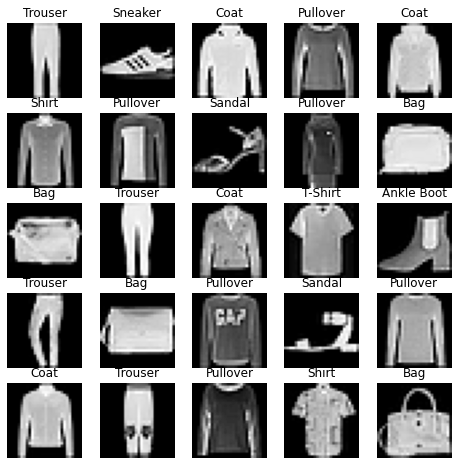

In [ ]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx][0][0,:,:].numpy() # numpy()를 통해 torch Tensor를 numpy array로 변환
    label = labels_map[train_data[data_idx][1]] # item()을 통해 torch Tensor를 숫자로 변환
    
    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
label

'Bag'

# 네트워크 설계 

In [ ]:
class DNN(nn.Module):
    def __init__(self, num_classes=10):
        super(DNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(28*28,512),
            nn.BatchNorm1d(512),
            nn.ReLU()

        )
        self.layer2 = nn.Sequential(
            nn.Linear(512,10)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten
        x_out = self.layer1(x)
        x_out = self.layer2(x_out)
        return x_out

# Weight initialization


In [ ]:
def weights_init(m):
    if isinstance(m, nn.Linear): # 모델의 모든 MLP 레이어에 대해서
        nn.init.xavier_normal_(m.weight) # Weight를 xavier_normal로 초기화
        print(m.weight)

# 모델 생성

In [ ]:
torch.manual_seed(7777) # 일관된 weight initialization을 위한 random seed 설정
model = DNN().to(device)
model.apply(weights_init) # 모델에 weight_init 함수를 적용하여 weight를 초기화

Parameter containing:
tensor([[-0.0113, -0.0095, -0.0257,  ..., -0.0324,  0.0534, -0.0091],
        [-0.0407,  0.0350, -0.0196,  ..., -0.0266,  0.0307,  0.0381],
        [-0.0205,  0.0367,  0.0094,  ..., -0.0310, -0.0451,  0.0051],
        ...,
        [ 0.0224,  0.0218,  0.0649,  ..., -0.0711,  0.0516,  0.0244],
        [-0.0069,  0.0066, -0.0228,  ...,  0.0111,  0.0148, -0.0265],
        [ 0.0097,  0.0041,  0.0480,  ...,  0.0044, -0.0069,  0.0417]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0278,  0.1138, -0.0497,  ...,  0.0713, -0.1142, -0.0279],
        [ 0.1104,  0.1485,  0.0111,  ..., -0.0413, -0.0416, -0.0403],
        [ 0.0723,  0.0004,  0.0527,  ..., -0.0378, -0.0192,  0.0166],
        ...,
        [ 0.0913, -0.0038, -0.0674,  ...,  0.0191,  0.0053,  0.0374],
        [-0.0781, -0.0059, -0.0229,  ..., -0.0934,  0.0464, -0.0997],
        [ 0.0680,  0.0889, -0.1250,  ..., -0.0719,  0.0563,  0.0140]],
       device='cuda:0', requires_grad=True)


DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
  )
)

# Loss function 및 Optimizer 정의

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Training

In [ ]:
for epoch in range(num_epochs):
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        ## 코드 시작 ##
        outputs = model(imgs)  # 위의 설명 1. 을 참고하여 None을 채우세요.
        loss = criterion(outputs,labels)    # 위의 설명 2. 를 참고하여 None을 채우세요.
        
        optimizer.zero_grad()            # Clear gradients: 위의 설명 3. 을 참고하여 None을 채우세요.
        loss.backward()            # Gradients 계산: 위의 설명 4. 를 참고하여 None을 채우세요.
        optimizer.step()            # Parameters 업데이트: 위의 설명 5. 를 참고하여 None을 채우세요.
        ## 코드 종료 ##
        
        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
                epoch+1, num_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

Epoch [1/5], Step [100/600], Loss: 0.4258, Accuracy: 88.00%
Epoch [1/5], Step [200/600], Loss: 0.4828, Accuracy: 81.00%
Epoch [1/5], Step [300/600], Loss: 0.4053, Accuracy: 87.00%
Epoch [1/5], Step [400/600], Loss: 0.3483, Accuracy: 88.00%
Epoch [1/5], Step [500/600], Loss: 0.5386, Accuracy: 82.00%
Epoch [1/5], Step [600/600], Loss: 0.2823, Accuracy: 91.00%
Epoch [2/5], Step [100/600], Loss: 0.2811, Accuracy: 90.00%
Epoch [2/5], Step [200/600], Loss: 0.3016, Accuracy: 89.00%
Epoch [2/5], Step [300/600], Loss: 0.2250, Accuracy: 89.00%
Epoch [2/5], Step [400/600], Loss: 0.1839, Accuracy: 93.00%
Epoch [2/5], Step [500/600], Loss: 0.1864, Accuracy: 93.00%
Epoch [2/5], Step [600/600], Loss: 0.4153, Accuracy: 83.00%
Epoch [3/5], Step [100/600], Loss: 0.1785, Accuracy: 93.00%
Epoch [3/5], Step [200/600], Loss: 0.3142, Accuracy: 90.00%
Epoch [3/5], Step [300/600], Loss: 0.2433, Accuracy: 91.00%
Epoch [3/5], Step [400/600], Loss: 0.2366, Accuracy: 89.00%
Epoch [3/5], Step [500/600], Loss: 0.290

# Test

In [ ]:
model.eval() # 모델을 평가(evaluation) 모드로 설정

DNN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 10000 images: 87.45%


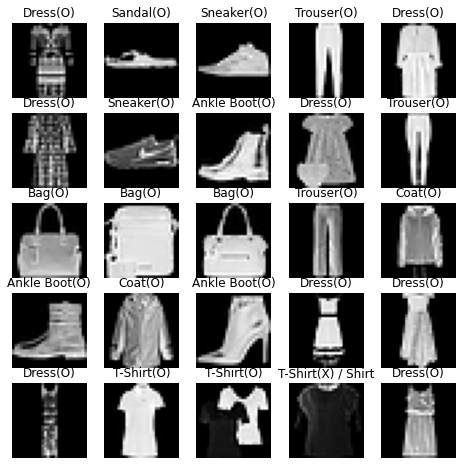

In [ ]:
columns = 5
rows = 5
fig = plt.figure(figsize=(8,8))

model.eval()
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(test_data))
    input_img = test_data[data_idx][0].unsqueeze(dim=0).to(device) 
    '''
    unsqueeze()를 통해 입력 이미지의 shape을 (1, 28, 28)에서 (1, 1, 28, 28)로 변환. 
    모델에 들어가는 입력 이미지의 shape은 (batch_size, channel, width, height) 되어야 함에 주의하세요!
    '''
    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = labels_map[argmax.item()]
    label = labels_map[test_data[data_idx][1]]
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + '(O)')
    else:
        plt.title(pred + '(X)' + ' / ' + label)
    plot_img = test_data[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap='gray')
    plt.axis('off')
model.train()
plt.show()